<a href="https://colab.research.google.com/github/sames12421/projrct-ml/blob/main/anamaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df=pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
x=df.drop('Class',axis=1)
y=df['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# The order of returned values from train_test_split is x_train, x_test, y_train, y_test
# This line now correctly assigns the returned values to the corresponding variables

In [ ]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [ ]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=30))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9884 - loss: 0.0380 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9995 - val_loss: 0.0031
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9996 - loss: 0

In [ ]:
history=model.evaluate(x_test,y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9993 - loss: 0.0044


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9994 - val_loss: 0.0039
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9994 - val_loss: 0.0039
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9994 - val_loss: 0.0041
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9994 - val_loss: 0.0040
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9995 - val_loss: 0.0045
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9996 - loss: 0

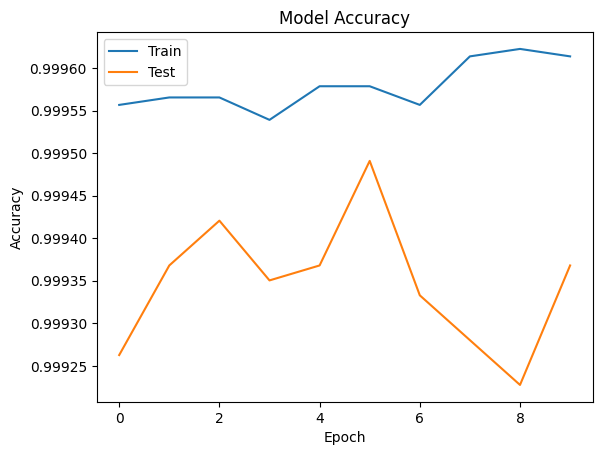

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
# The 'history' variable now correctly stores the training history

# Evaluate the model and store the results separately
loss, accuracy = model.evaluate(x_test, y_test)

# Print the evaluation results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Now you can plot the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()